In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([1,2,3])
Y = np.array([1,3,3])

In [3]:
a = np.linspace(-1, 3, 501)
b = np.linspace(-2, 2, 501)

In [4]:
A, B = np.meshgrid(a, b)

In [8]:
def gaussian(x):
    return np.exp(-x**2)

In [14]:
def likelihood(x, y, A, B):
    e = y-(A*x+B)
    return gaussian(e)

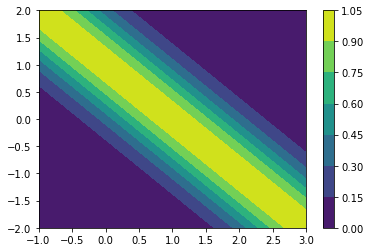

In [24]:
L = likelihood(X[0], X[0], A, B)
plt.contourf(A, B, L)
plt.colorbar()

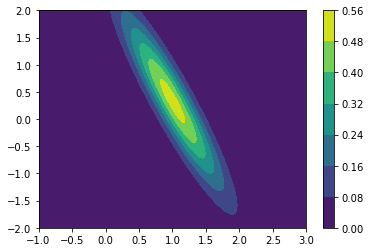

In [28]:
L = likelihood(X[0], Y[0], A, B)
L *= likelihood(X[1], Y[1], A, B)
L *= likelihood(X[2], Y[2], A, B)
plt.contourf(A, B, L)
plt.colorbar()

In [30]:
L.argmax()

146542

In [32]:
146542//501

292

In [33]:
146542 % 501

250

In [34]:
def likelihood(x, y, r, sx, sy):
    d = np.sqrt((x-sx)**2+(y-sy)**2)
    e = d-r
    return gaussian(e)

In [35]:
x = np.linspace(-100, 100, 1001)
y = np.linspace(-100, 100, 1001)
X, Y = np.meshgrid(x, y)

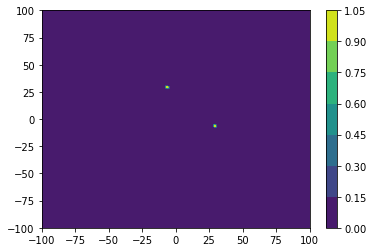

In [45]:
L = likelihood(X, Y, 30, 0, 0)
L *= likelihood(X, Y, 100, 80, 80)
plt.contourf(X, Y, L)
plt.colorbar()

In [46]:
N = np.array(range(10))

In [47]:
apriori = np.ones_like(N)

<BarContainer object of 10 artists>

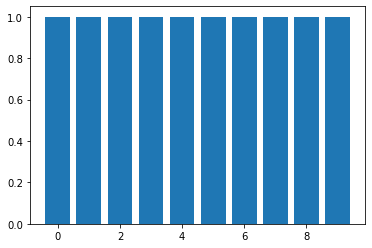

In [52]:
plt.bar(N, apriori, width=0.8)

In [53]:
D = [2, 3, 3, 4, 2]

In [63]:
def likelihood(d):
    P = np.zeros_like(N, dtype=float)
    P[d] = 0.6
    if d-1>=0:
        P[d-1] = 0.2
    if d+1 < len(P):
        P[d+1] = 0.2
    return P

In [64]:
likelihood(0)

array([0.6, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

<BarContainer object of 10 artists>

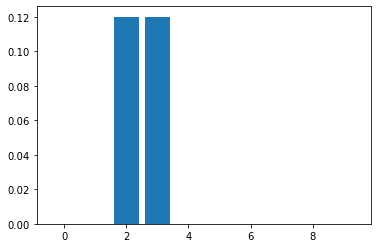

In [70]:
posteori = np.ones_like(N, dtype=float)
for d in D:
    posteori *= likelihood(d)
plt.bar(N, L, width=0.8)